# Does faculty salary vary by gender and/or rank?

## Set up

Before getting started, the only addtional library you should have to install (that did not come with the anaconda python distribution) is `seaborn`, a package for visualization. Execute this command on your terminal.

```
pip install seaborn
```

Let's begin by reading in some data from [this course website](http://data.princeton.edu/wws509/datasets/#salary). Columns included are:

- **sx** = Sex, coded 1 for female and 0 for male
- **rk** = Rank, coded
    - 1 for assistant professor,
    - 2 for associate professor, and
    - 3 for full professor
- **yr** = Number of years in current rank
- **dg** = Highest degree, coded 1 if doctorate, 0 if masters
- **yd** = Number of years since highest degree was earned
- **sl** = Academic year salary, in dollars.

In [1]:
# Set up
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
import urllib.request # to load data
from scipy import stats # ANOVA
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import matplotlib.pyplot as plt # plotting
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline 

In [2]:
# Read data from URL
data = urllib.request.urlopen('http://data.princeton.edu/wws509/datasets/salary.dat')
salary_data= pd.read_table(data, sep='\s+')
salary_data.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


## Descriptive statistics by gender

Before doing any statistical tests, you should get a basic feel for the gender breakdown in your dataset

In [3]:
# What is the number of males/females in the dataset? What does this already tell you...?
salary_data.groupby('sx').size()

sx
female    14
male      38
dtype: int64

In [4]:
# What is the mean salary by sex?
salary_data.groupby('sx').mean()['sl']

sx
female    21357.142857
male      24696.789474
Name: sl, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a173a5590>,
      dtype=object)

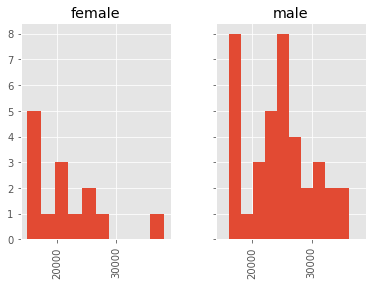

In [5]:
# Draw histograms for the distribution of salaries for males and females (separately)
# Hint: you can use the `.hist` method, and specify what you want to separate *by*
# The x and y axes should be consistent between the graphs
salary_data.hist('sl', by='sx', sharex=True, sharey=True)

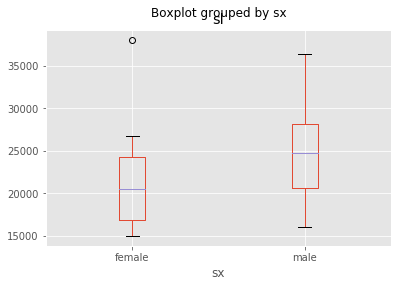

In [6]:
# Create a boxplot of the salaries by sex -- don't worry if you get a warning here.
salary_data.boxplot('sl', by='sx')

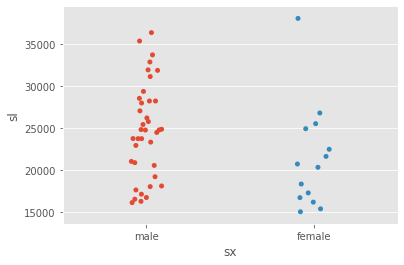

In [7]:
# Show salary distributions for males and females in a stripplot (jittered density plot)
# Use the sns.stripplot method
sns.stripplot(data=salary_data, x='sx', y='sl')

## Test for a difference in means by gender
Use a t-test to see if there is a significant difference in means

In [8]:
# Separate males and females into different variables
male = salary_data[salary_data.sx == 'male']
female = salary_data[salary_data.sx == 'female']

In [9]:
# Test for difference using `ttest_ind
stats.ttest_ind(male.sl, female.sl)

Ttest_indResult(statistic=1.8474402832932844, pvalue=0.07060393644390568)

## Descriptive Statistics by Rank

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17e4e810>,
      dtype=object)

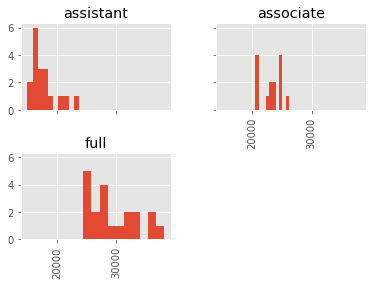

In [10]:
# Draw histograms for the distribution of salaries by rank
salary_data.hist('sl', by='rk', sharex=True, sharey=True)

## Test for differences in means by rank

First, we'll want to leverage the **t-test** to test for differences by rank. To do this, we'll need to first break the dataset into two groups (full professors, not-full professors), then perform our t-test.

In [11]:
# Separate into different variables by rank (full, not_full)
full = salary_data[salary_data.rk == 'full']
not_full = salary_data[salary_data.rk != 'full']

# Test for difference
stats.ttest_ind(full.sl, not_full.sl)

Ttest_indResult(statistic=9.13361444071646, pvalue=3.0965017065059518e-12)

Alternatively, we could use an **Analysis of Variance (ANOVA)** test to assess the statistical significance in differences across multiple groups (an extension of the t-test)

In [12]:
# Use the ANOVA method to test for differences in means across multiple groups
# Use the `stats.f_oneway` method to perform the test
stats.f_oneway(full['sl'], not_full['sl'])

F_onewayResult(statistic=83.42291275166428, pvalue=3.0965017065059457e-12)

## How does salary (`sl`) compare to years since degress (`yd`) and years in current rank (`yr`)?

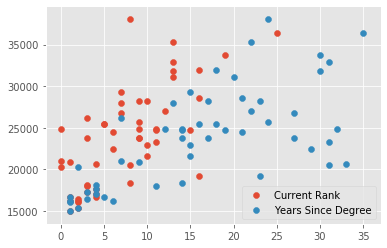

In [13]:
# Create scatterplots to show how salary compares to years since degree / in current rank
# Show these at the same time
p1 = plt.scatter(x=salary_data['yr'], y=salary_data['sl'], label = 'Current Rank') 
p2 = plt.scatter(x=salary_data['yd'], y=salary_data['sl'], label = 'Years Since Degree') 
plt.legend(handles=[p1, p2])
plt.show()

## How does salary vary across rank and sex?

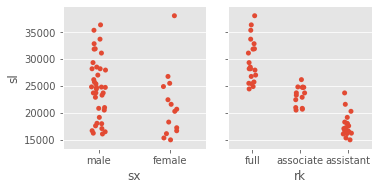

In [14]:
# Create stripplots of salary by sex and by rank placed next to one another
# Hint: you can use `sns.PairGrid`
sns.PairGrid(salary_data, x_vars=['sx', 'rk'], y_vars=['sl']).map(sns.stripplot)

/Users/yasmine/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


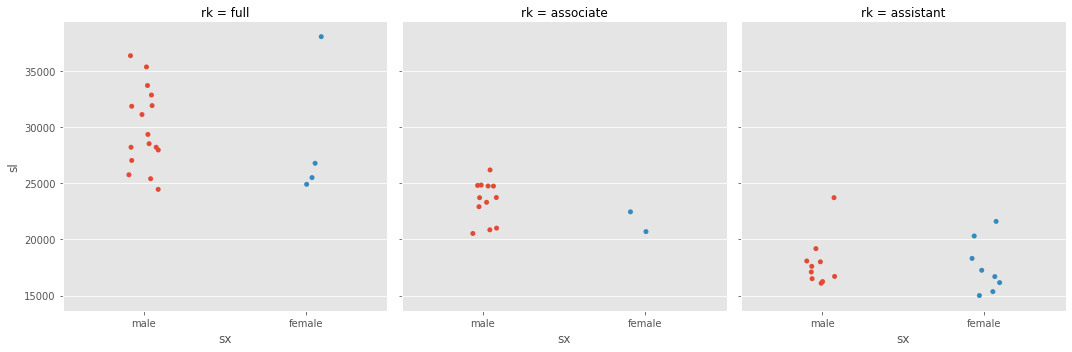

In [15]:
# Create different stripplots of salary (by gender) for each rank
sns.factorplot(x="sx", y="sl", 
               col="rk", data=salary_data, kind="strip", jitter=True);

What does this tell you about gender discrimination on the faculty?
> The stripplots tells us that female professors generally get paid less than male professors. There are less females than males in all ranks, but more concerningly, the ratio is significantly smaller as rank goes up.